In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import datasets
from umap import UMAP
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import spectral_embedding
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [2]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

In [3]:
n_neighbors = 10
n_clusters = 15
n_components = n_clusters

In [4]:
%%time
neigh = NearestNeighbors(n_neighbors=n_neighbors)
neigh.fit(X)
gamma = 1./X.shape[1]
distances = neigh.kneighbors_graph(X)
distances.data = distances.data ** 2
distances.data *= -gamma
np.exp(distances.data, distances.data)
distances = 0.5 * (distances + distances.transpose())
embedding = spectral_embedding(distances,
                       n_components=n_components)
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(embedding)

CPU times: user 556 ms, sys: 222 ms, total: 778 ms
Wall time: 389 ms


In [5]:
confusion_matrix(labels, y)[:, :10]

array([[  0,   0,   0, 174,   0,   0,   0,   0,   1,   2],
       [  0,  99,   0,   0,   0,   0,   0,   0,   5,   0],
       [  0,   0,   0,   0, 177,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0, 110,   0,   0,   0,   0],
       [  0,   0, 115,   0,   0,   0,   0,   0,   0,   0],
       [178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1, 180,   0,   0,   0],
       [  0,   0,   1,   2,   3,   0,   0, 166,   0,   0],
       [  0,   0,   0,   0,   0,  70,   0,   0,   0,   2],
       [  0,   0,  10,   6,   1,   0,   1,   1, 165,  12],
       [  0,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0, 143],
       [  0,  56,   0,   0,   0,   0,   0,   0,   3,  21],
       [  0,   0,   0,   0,   0,   0,   0,  12,   0,   0],
       [  0,   0,  51,   0,   0,   0,   0,   0,   0,   0]])

In [6]:
%%time
umap = UMAP()
Y = umap.fit_transform(X)

/home/mbr085/anaconda3/envs/divisivegater/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../anaconda3/envs/divisivegater/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/mbr085/anaconda3/envs/divisivegater/lib/python3.7/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../anaconda3/envs/divisivegater/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/mbr085/anaconda3/envs/divisivegate

CPU times: user 6.16 s, sys: 286 ms, total: 6.45 s
Wall time: 5.9 s


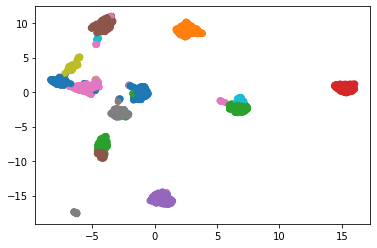

In [7]:
plt.scatter(Y[:,0], Y[:,1], c=labels, cmap="tab10")

In [8]:
idx = 3

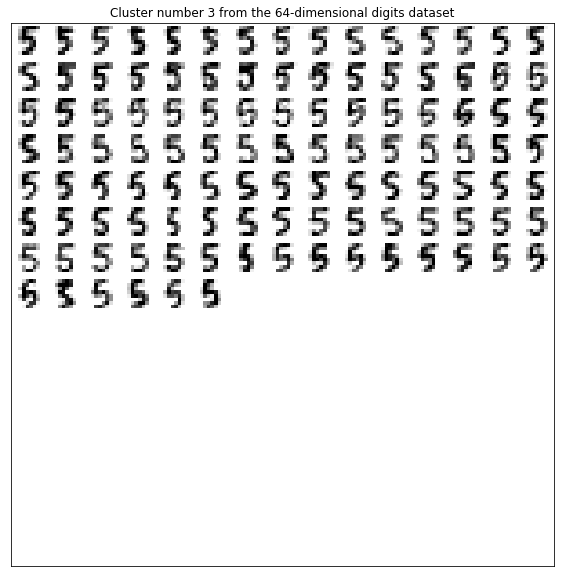

In [18]:
# Plot images of the digits
plt.figure(figsize=(10,10))
sample = labels == idx
n_img_per_row = 15
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):        
        if i * n_img_per_row + j >= sum(sample):
            continue
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[sample][i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Cluster number {:d} from the 64-dimensional digits dataset'.format(idx));

